# 第2章 感知机

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris #导入数据集
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# load data
"""
    iris数据集中一共150行记录. 
    特征有4个: 花萼长度, 花萼宽度, 花瓣长度, 花瓣宽度。保存在iris.data中, 二维数组, 150行, 每一行为4个特征的取值. 
    标记label(target)类别有3个: Setosa, Versicolour, Virginica. 分别用0, 1, 2表示. 
    前50个的标记为0, 中间50为1, 后50为2. 
"""
iris = load_iris() #加载iris数据集
# print(iris)
df = pd.DataFrame(iris.data, columns=iris.feature_names)#创建一个类似excel的数据表，将特征数据放入
df['label'] = iris.target #增加一列label,对应类别标记
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

In [7]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
] #修改列名
print(df)
df.label.value_counts() #计算不同label值对应的数据有几个
# df.label.count() #计算有多少个label

     sepal length  sepal width  petal length  petal width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


0    50
1    50
2    50
Name: label, dtype: int64

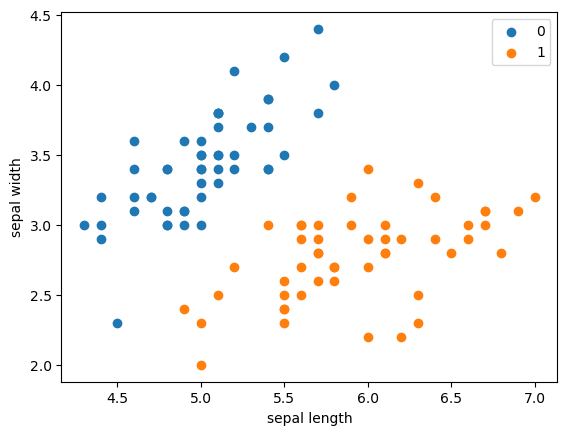

In [8]:
#建立图像，横坐标是长度，纵坐标是宽度
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0') #把前五十个Setosa类别的数据画出来
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1') #把中间五十个Versicolour类别的数据画出来
# plt.scatter(df[100:150]['sepal length'], df[100:150]['sepal width'], label='2')
plt.xlabel('sepal length') #给横坐标取名
plt.ylabel('sepal width') #给纵坐标取名
plt.legend() #显示图像

In [9]:
""" iloc(index, columns)
    用于根据行列号对数据进行切片
    index: 哪一行或哪几行
    columns: 哪一列或哪几列
"""
data = np.array(df.iloc[:100, [0, 1, -1]]) #切出前一百行数据，前两列和最后一列，-1是最后一列
print(data)

[[5.1 3.5 0. ]
 [4.9 3.  0. ]
 [4.7 3.2 0. ]
 [4.6 3.1 0. ]
 [5.  3.6 0. ]
 [5.4 3.9 0. ]
 [4.6 3.4 0. ]
 [5.  3.4 0. ]
 [4.4 2.9 0. ]
 [4.9 3.1 0. ]
 [5.4 3.7 0. ]
 [4.8 3.4 0. ]
 [4.8 3.  0. ]
 [4.3 3.  0. ]
 [5.8 4.  0. ]
 [5.7 4.4 0. ]
 [5.4 3.9 0. ]
 [5.1 3.5 0. ]
 [5.7 3.8 0. ]
 [5.1 3.8 0. ]
 [5.4 3.4 0. ]
 [5.1 3.7 0. ]
 [4.6 3.6 0. ]
 [5.1 3.3 0. ]
 [4.8 3.4 0. ]
 [5.  3.  0. ]
 [5.  3.4 0. ]
 [5.2 3.5 0. ]
 [5.2 3.4 0. ]
 [4.7 3.2 0. ]
 [4.8 3.1 0. ]
 [5.4 3.4 0. ]
 [5.2 4.1 0. ]
 [5.5 4.2 0. ]
 [4.9 3.1 0. ]
 [5.  3.2 0. ]
 [5.5 3.5 0. ]
 [4.9 3.6 0. ]
 [4.4 3.  0. ]
 [5.1 3.4 0. ]
 [5.  3.5 0. ]
 [4.5 2.3 0. ]
 [4.4 3.2 0. ]
 [5.  3.5 0. ]
 [5.1 3.8 0. ]
 [4.8 3.  0. ]
 [5.1 3.8 0. ]
 [4.6 3.2 0. ]
 [5.3 3.7 0. ]
 [5.  3.3 0. ]
 [7.  3.2 1. ]
 [6.4 3.2 1. ]
 [6.9 3.1 1. ]
 [5.5 2.3 1. ]
 [6.5 2.8 1. ]
 [5.7 2.8 1. ]
 [6.3 3.3 1. ]
 [4.9 2.4 1. ]
 [6.6 2.9 1. ]
 [5.2 2.7 1. ]
 [5.  2.  1. ]
 [5.9 3.  1. ]
 [6.  2.2 1. ]
 [6.1 2.9 1. ]
 [5.6 2.9 1. ]
 [6.7 3.1 1. ]
 [5.6 3.  

In [10]:
X, y = data[:,:-1], data[:,-1] #X为二维数组，数据为data中的前两列，y为data中的最后一列
# print(X)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [11]:
y = np.array([1 if i == 1 else -1 for i in y]) #把y中的0替换成-1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Perceptron

In [12]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self): #初始化
        #np.ones(shape, dtype=None, order='C')，返回给定形状和数据类型的新数组
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32) #定义一个数组
        self.b = 0
        self.l_rate = 0.1 #学习率为0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b #得到x和w内积，加上b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False #错误标记
        while not is_wrong: #循环直到没有错误
            wrong_count = 0 #记录错误的数量
            for d in range(len(X_train)): #遍历这100个数据
                X = X_train[d] #赋值给当前花的特征值
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0: #判断是否异号，异号则分类错误
                    self.w = self.w + self.l_rate * np.dot(y, X) #分类错误就更新w的值
                    self.b = self.b + self.l_rate * y #分类错误就更新b
                    wrong_count += 1 #错误标记加1
            if wrong_count == 0: #如果没有出错
                is_wrong = True #没有错
        return 'Perceptron Model!'

    def score(self):
        pass

In [13]:
perceptron = Model() #定义一个对象模型
perceptron.fit(X, y) #训练模型

'Perceptron Model!'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18828\3206327025.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo',c='orange', label='1') #中间五十个特征值


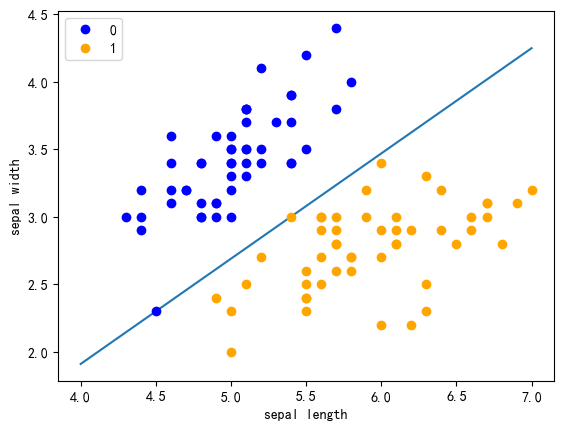

In [29]:
x_points = np.linspace(4, 7, 10) #从4到7取间隔相同的十个数
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 画出感知机的线, 使前50和中间50分别在感知机线的两边
plt.plot(x_points, y_) #画图

plt.plot(data[:50, 0], data[:50, 1], 'bo', label='0') #前五十个特征值
plt.plot(data[50:100, 0], data[50:100, 1], 'bo',c='orange', label='1') #中间五十个特征值
plt.xlabel('sepal length') #x轴
plt.ylabel('sepal width') #y轴
plt.legend() #显示图像

### scikit-learn实例

In [22]:
import sklearn
from sklearn.linear_model import Perceptron

In [23]:
sklearn.__version__ #版本号

'1.2.1'

In [24]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True) #使用感知机
clf.fit(X, y) #训练数据集

Perceptron()

In [26]:
# Weights assigned to the features.
print(clf.coef_) #打印训练后的w

[[ 23.2 -38.7]]


In [27]:
# 截距 Constants in decision function.
print(clf.intercept_) #打印训练后的b

[-5.]


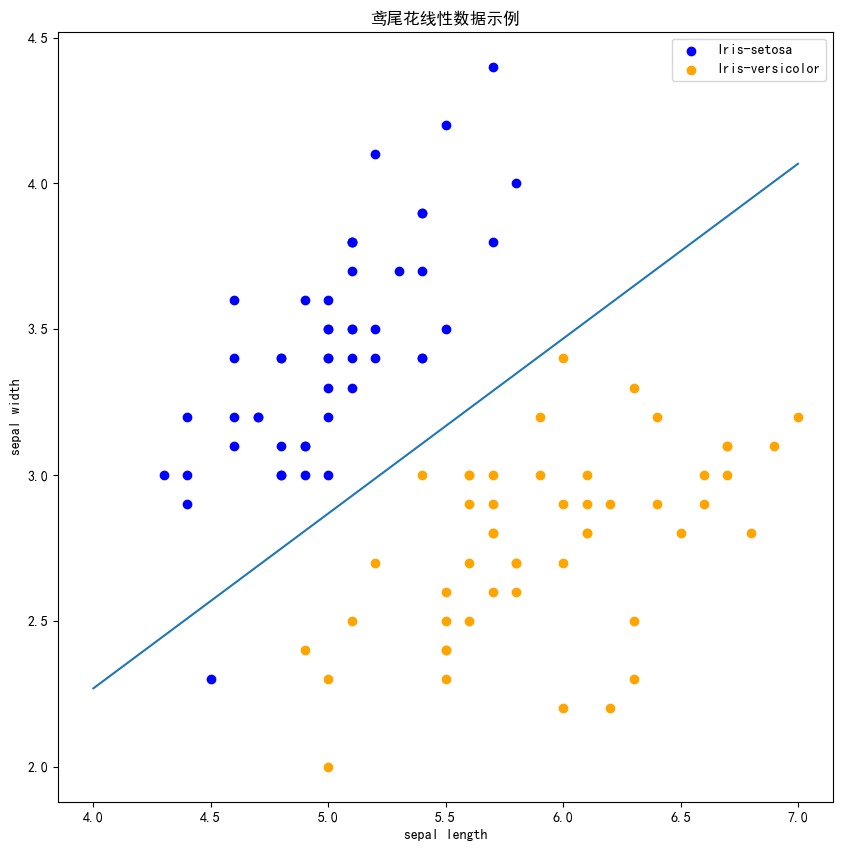

In [28]:
# 画布大小
plt.figure(figsize=(10,10)) #定义画布大小

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei'] #字体类型
plt.rcParams['axes.unicode_minus'] = False #字符显示
plt.title('鸢尾花线性数据示例') #图名

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',) #前五十个特征值
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor') #中间五十个

# 画感知机的线
x_ponits = np.arange(4, 8) #默认步长加1，四个点，4567
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1] #画出感知机线
plt.plot(x_ponits, y_) 

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length') #坐标轴取名
plt.ylabel('sepal width')
plt.legend() #显示图像

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

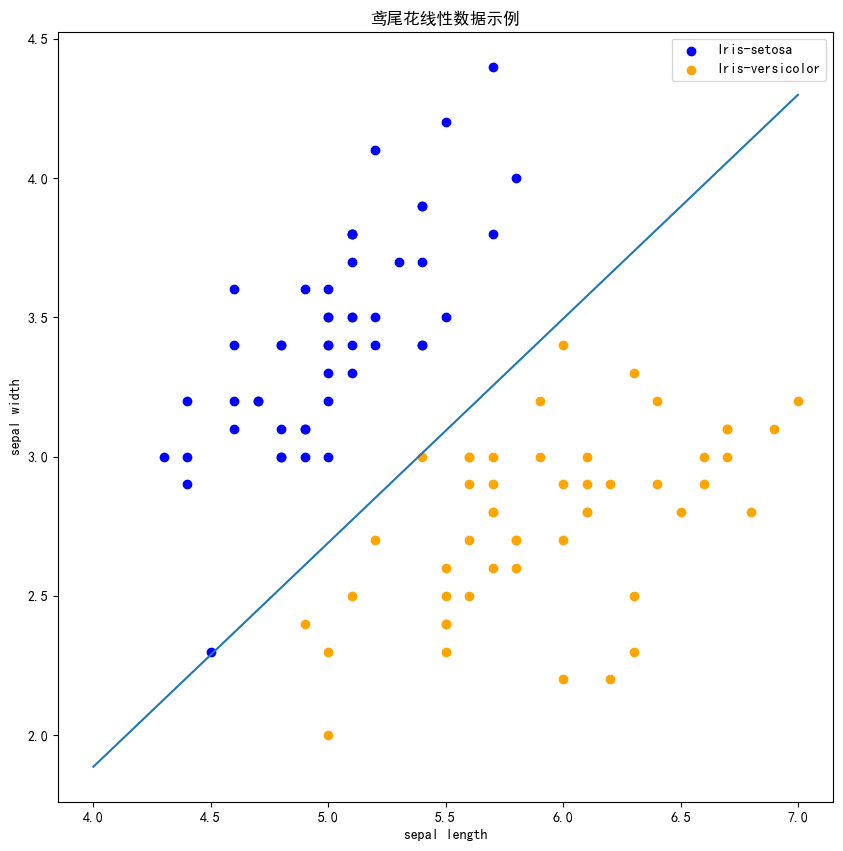

In [30]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True) #tol=None,使其不停止迭代
clf.fit(X, y) #训练模型

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

----

## 第2章感知机-习题

### 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 

参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)